### Pre-modelo

#### Import

In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from prophet import Prophet

import plotly.graph_objects as go

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Cargar datos

In [5]:
CWD = os.getcwd()
DATA_PATH = r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\df_modelo.xlsx'
ruta_data = os.path.join(CWD, DATA_PATH)

In [6]:
df = pd.read_excel(ruta_data)
df.head(15)

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,...,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Sexo,Index_year,ID_Country,GEI
0,62,39,8,36,65,2574,23107,12,23,18,...,78,59,53,55,3,6,0,2013,AT,58.669621
1,54,35,11,33,66,2835,19734,13,25,27,...,78,64,50,36,1,3,0,2013,BE,69.255331
2,51,33,4,31,62,827,7027,18,19,15,...,70,63,47,18,14,15,0,2013,BG,55.038562
3,65,41,6,18,51,2503,21851,14,22,27,...,79,65,54,39,6,14,0,2013,CY,48.986893
4,63,37,5,11,65,1438,11357,7,30,15,...,75,62,54,37,4,5,0,2013,CZ,55.569285
5,58,39,9,18,68,3062,20995,14,22,26,...,78,58,47,53,6,4,0,2013,DE,62.605909
6,58,41,13,50,73,3307,19324,14,21,24,...,77,62,44,59,4,5,0,2013,DK,75.224597
7,53,36,5,16,65,1424,9025,15,19,22,...,71,54,43,36,5,7,0,2013,EE,53.367682
8,57,37,7,16,52,2134,15168,19,18,18,...,78,66,54,25,6,7,0,2013,GR,48.614853
9,53,38,7,35,57,2239,17879,19,17,24,...,79,65,62,46,7,9,0,2013,ES,66.379688


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FTE              392 non-null    int64  
 1   DWL              392 non-null    int64  
 2   EPEHHASWA        392 non-null    int64  
 3   ATTAOTDWH        392 non-null    int64  
 4   CPI              392 non-null    int64  
 5   MME              392 non-null    int64  
 6   MENI             392 non-null    int64  
 7   ARP              392 non-null    int64  
 8   S20/S80IQ        392 non-null    int64  
 9   GTE              392 non-null    int64  
 10  PFNFEAT          392 non-null    int64  
 11  TSEFEHWA         392 non-null    int64  
 12  PCAEPTCGEOPD     392 non-null    int64  
 13  PDCAHE           392 non-null    int64  
 14  WDSCLOTHAODOSTW  392 non-null    int64  
 15  WIVORCAAOM       392 non-null    int64  
 16  SOM              392 non-null    int64  
 17  SOMP            

In [8]:
# Para hacer time series, nos quedaremos con año, país y GEI.

In [9]:
columns_stay = ['Index_year', 'GEI', 'ID_Country']

In [10]:
df = df[columns_stay]
df.head()

,Index_year,GEI,ID_Country
0,2013,58.669621,AT
1,2013,69.255331,BE
2,2013,55.038562,BG
3,2013,48.986893,CY
4,2013,55.569285,CZ


In [11]:
# Checkeamos duplicados
df.duplicated().sum()

196

In [12]:
# Eliminamos duplicados (se producen columna sexo)
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 363
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index_year  196 non-null    int64  
 1   GEI         196 non-null    float64
 2   ID_Country  196 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.1+ KB


In [14]:
países = df['ID_Country'].unique().tolist()
len(países)

28

In [15]:
# Qué años estudia
df['Index_year'].value_counts()

Index_year
2013    28
2015    28
2017    28
2019    28
2020    28
2021    28
2022    28
Name: count, dtype: int64

Para los años sin datos (2014, 2016, 2018), usaremos el GEI como la media del año anterior y posterior.

In [16]:
# Crear un nuevo DataFrame con 28 filas para el año 2014
nulos_2014 = pd.DataFrame({
    'Index_year': [2014] * 28,
    'ID_Country': países ,
})

In [17]:
mean_2014 = df[(df['Index_year']==2013) | (df['Index_year']==2015)].groupby('ID_Country')['GEI'].mean().reset_index()

In [18]:
nulos_2014 = pd.merge(nulos_2014, mean_2014, on='ID_Country', how='inner')
nulos_2014

,Index_year,ID_Country,GEI
0,2014,AT,60.005075
1,2014,BE,69.721550
2,2014,BG,55.993670
3,2014,CY,49.791172
4,2014,CZ,56.154957
5,2014,DE,63.758389
6,2014,DK,75.411662
7,2014,EE,53.409057
8,2014,GR,49.334991
9,2014,ES,66.869451


In [19]:
# Crear un nuevo DataFrame con 28 filas para el año 2016
nulos_2016 = pd.DataFrame({
    'Index_year': [2016] * 28,
    'ID_Country': países ,
})

In [20]:
mean_2016 = df[(df['Index_year']==2015) | (df['Index_year']==2017)].groupby('ID_Country')['GEI'].mean().reset_index()

In [21]:
nulos_2016 = pd.merge(nulos_2016, mean_2016, on='ID_Country', how='inner')
nulos_2016

,Index_year,ID_Country,GEI
0,2016,AT,62.336431
1,2016,BE,70.331165
2,2016,BG,57.471407
3,2016,CY,52.838152
4,2016,CZ,55.175997
5,2016,DE,65.194028
6,2016,DK,76.193339
7,2016,EE,55.087565
8,2016,GR,50.003716
9,2016,ES,67.853420


In [22]:
# Crear un nuevo DataFrame con 28 filas para el año 2018
nulos_2018 = pd.DataFrame({
    'Index_year': [2018] * 28,
    'ID_Country': países ,
})

In [23]:
mean_2018 = df[(df['Index_year']==2017) | (df['Index_year']==2019)].groupby('ID_Country')['GEI'].mean().reset_index()

In [24]:
nulos_2018 = pd.merge(nulos_2018, mean_2018, on='ID_Country', how='inner')
nulos_2018

,Index_year,ID_Country,GEI
0,2018,AT,64.313657
1,2018,BE,70.795177
2,2018,BG,58.410368
3,2018,CY,55.675143
4,2018,CZ,54.650490
5,2018,DE,66.164927
6,2018,DK,77.120032
7,2018,EE,58.281230
8,2018,GR,50.579076
9,2018,ES,69.244850


In [25]:
df = pd.concat([df, nulos_2014, nulos_2016, nulos_2018], ignore_index=True)

Para los años que vamos a predecir, creamos columnas con nulos.

In [26]:
# Crear un nuevo DataFrame con 28 filas para el año 2023
predict_2023 = pd.DataFrame({
    'Index_year': [2023] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [27]:
# Crear un nuevo DataFrame con 28 filas para el año 2024
predict_2024 = pd.DataFrame({
    'Index_year': [2024] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [28]:
# Crear un nuevo DataFrame con 28 filas para el año 2025
predict_2025 = pd.DataFrame({
    'Index_year': [2025] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [29]:
# Crear un nuevo DataFrame con 28 filas para el año 2026
predict_2026 = pd.DataFrame({
    'Index_year': [2026] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [30]:
# Crear un nuevo DataFrame con 28 filas para el año 2027
predict_2027 = pd.DataFrame({
    'Index_year': [2027] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [31]:
# Crear un nuevo DataFrame con 28 filas para el año 2028
predict_2028 = pd.DataFrame({
    'Index_year': [2028] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [32]:
# Crear un nuevo DataFrame con 28 filas para el año 2029
predict_2029 = pd.DataFrame({
    'Index_year': [2029] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [33]:
# Crear un nuevo DataFrame con 28 filas para el año 2029
predict_2030 = pd.DataFrame({
    'Index_year': [2030] * 28,
    'ID_Country': países ,
    'GEI': [np.nan] * 28
})

In [34]:
df = pd.concat([df, predict_2023, predict_2024, predict_2025, predict_2026, predict_2027, predict_2028, predict_2029, predict_2030], ignore_index=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index_year  504 non-null    int64  
 1   GEI         280 non-null    float64
 2   ID_Country  504 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.9+ KB


In [36]:
df.rename(columns={'Index_year': 'ds'}, inplace=True)
df.rename(columns={'GEI': 'y'}, inplace=True)

In [37]:
# Agrupa el DataFrame por país
grouped = df.groupby('ID_Country')

# Ahora puedes iterar sobre cada grupo y crear un nuevo DataFrame para cada país
# Creamos un diccionario donde cada clave es el nombre del país y el valor es el DataFrame correspondiente
country_dfs = {country: data.reset_index(drop=True) for country, data in grouped}

## Predicción para cada país

### Predicción AT - Austria

In [38]:
at_df = country_dfs['AT']

In [39]:
del at_df['ID_Country']
at_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [40]:
train_index = sorted(list(at_df["ds"].unique()))[:-8]
test_index = sorted(list(at_df["ds"].unique()))[-8:]

In [41]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [42]:
at_train = at_df[at_df["ds"].isin(train_index)]
at_test = at_df[at_df["ds"].isin(test_index)]

#### Model train

In [43]:
model = Prophet()

In [44]:
model.fit(at_train)

22:55:09 - cmdstanpy - INFO - Chain [1] start processing


22:55:16 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [45]:
at_test_predict = model.predict(at_test)

In [46]:
at_test_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,107.042057,69.644002,70.015431,106.861464,107.232892,-37.217461,-37.217461,-37.217461,-37.217461,-37.217461,-37.217461,0.0,0.0,0.0,69.824596
1,2024-01-01,108.171669,70.497213,71.676264,107.611684,108.790734,-37.114471,-37.114471,-37.114471,-37.114471,-37.114471,-37.114471,0.0,0.0,0.0,71.057198
2,2025-01-01,109.304375,71.354345,73.701815,108.159502,110.506972,-36.805157,-36.805157,-36.805157,-36.805157,-36.805157,-36.805157,0.0,0.0,0.0,72.499218
3,2026-01-01,110.433986,71.400700,75.184679,108.512113,112.296092,-37.111413,-37.111413,-37.111413,-37.111413,-37.111413,-37.111413,0.0,0.0,0.0,73.322573
4,2027-01-01,111.563597,71.778624,76.867730,108.996085,114.085192,-37.217461,-37.217461,-37.217461,-37.217461,-37.217461,-37.217461,0.0,0.0,0.0,74.346136
5,2028-01-01,112.693209,72.242934,78.935519,109.357405,116.049990,-37.114471,-37.114471,-37.114471,-37.114471,-37.114471,-37.114471,0.0,0.0,0.0,75.578738
6,2029-01-01,113.825915,72.859741,81.140075,109.664899,117.945233,-36.805157,-36.805157,-36.805157,-36.805157,-36.805157,-36.805157,0.0,0.0,0.0,77.020757
7,2030-01-01,114.955526,72.735622,82.995906,109.847035,120.107319,-37.111413,-37.111413,-37.111413,-37.111413,-37.111413,-37.111413,0.0,0.0,0.0,77.844113


In [47]:
import plotly.graph_objects as go

In [48]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, at_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([58.66962144, 60.00507478, 61.34052812, 62.33643114, 63.33233417,
                          64.31365675, 65.29497933, 66.53667135, 67.9786416 , 68.80201177])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.64400243, 70.49721309, 71.35434498, 71.40069999, 71.77862377,
                          72.24293381, 72.85974134, 72.73562243])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.82459626, 71.05719796, 72.49921754, 73.32257316, 74.34613621,
                          75.57873791, 77.02075749, 77.84411311])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([70.01543129, 71.67626351, 73.70181484, 75.18467939, 76.86773031,
                          78.93551882, 81.14007534, 82.99590592])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción BE - Bélgica

In [49]:
be_df = country_dfs['BE']

In [50]:
del be_df['ID_Country']
be_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [51]:
train_index = sorted(list(be_df["ds"].unique()))[:-8]
test_index = sorted(list(be_df["ds"].unique()))[-8:]

In [52]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [53]:
be_train = be_df[be_df["ds"].isin(train_index)]
be_test = be_df[be_df["ds"].isin(test_index)]

#### Model train

In [54]:
model = Prophet()

In [55]:
model.fit(be_train)

22:55:17 - cmdstanpy - INFO - Chain [1] start processing


22:55:25 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [56]:
be_test_predict = model.predict(be_test)

In [57]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, be_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([69.25533134, 69.72155031, 70.18776929, 70.33116455, 70.47455981,
                          70.79517666, 71.11579352, 71.44168748, 72.72650231, 74.19680559])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.4391023 , 76.43353094, 77.28133528, 78.26739544, 79.01348455,
                          79.72482466, 80.25337548, 80.78663997])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.58960695, 76.89932931, 78.18414443, 79.6544515 , 81.04690586,
                          82.35662821, 83.64144334, 85.1117504 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.7448257 , 77.4415401 , 79.27880028, 81.3685041 , 83.3944099 ,
                          85.47363649, 87.55758972, 89.82367106])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción BG - Bulgaria

In [58]:
bg_df = country_dfs['BG']

In [59]:
del bg_df['ID_Country']
bg_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [60]:
train_index = sorted(list(bg_df["ds"].unique()))[:-8]
test_index = sorted(list(bg_df["ds"].unique()))[-8:]

In [61]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [62]:
bg_train = bg_df[bg_df["ds"].isin(train_index)]
bg_test = bg_df[bg_df["ds"].isin(test_index)]

#### Model train

In [63]:
model = Prophet()

In [64]:
model.fit(bg_train)

22:55:25 - cmdstanpy - INFO - Chain [1] start processing
22:55:32 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [65]:
bg_test_predict = model.predict(bg_test)

In [66]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, bg_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([55.03856249, 55.99366976, 56.94877703, 57.47140676, 57.99403649,
                          58.41036792, 58.82669935, 59.60654581, 59.85829374, 60.69532253])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.32041079, 61.69197336, 61.34495552, 61.46339769, 61.35211841,
                          61.45202982, 60.6994021 , 60.44435436])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.51547781, 62.30872738, 62.56051355, 63.39753155, 64.21731383,
                          65.01056341, 65.26234957, 66.09936757])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.73925973, 63.05296287, 63.943244  , 65.49210999, 67.15661373,
                          68.97181142, 70.29794729, 72.31181691])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción CY - Chipre

In [67]:
cy_df = country_dfs['CY']

In [68]:
del cy_df['ID_Country']
cy_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [69]:
train_index = sorted(list(cy_df["ds"].unique()))[:-8]
test_index = sorted(list(cy_df["ds"].unique()))[-8:]

In [70]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [71]:
cy_train = cy_df[cy_df["ds"].isin(train_index)]
cy_test = cy_df[cy_df["ds"].isin(test_index)]

#### Model train

In [72]:
model = Prophet()

In [73]:
model.fit(cy_train)

22:55:32 - cmdstanpy - INFO - Chain [1] start processing
22:55:39 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [74]:
cy_test_predict = model.predict(cy_test)

In [75]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, cy_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([48.98689324, 49.79117172, 50.59545019, 52.83815218, 55.08085416,
                          55.67514349, 56.26943281, 56.89445819, 56.98272822, 57.27933149])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([57.25493941, 56.84666714, 55.94076094, 54.98172497, 53.71613578,
                          52.41084786, 50.88599578, 49.26757533])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([57.59631065, 57.93002651, 58.01827739, 58.31489295, 58.63037236,
                          58.96408822, 59.0523391 , 59.34895467])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([57.97325226, 59.11270305, 60.35815694, 62.05640215, 63.98429347,
                          66.04974433, 68.07102219, 70.01358845])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción CZ - República Checa

In [76]:
cz_df = country_dfs['CZ']

In [77]:
del cz_df['ID_Country']
cz_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [78]:
train_index = sorted(list(cz_df["ds"].unique()))[:-8]
test_index = sorted(list(cz_df["ds"].unique()))[-8:]

In [79]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [80]:
cz_train = cz_df[cz_df["ds"].isin(train_index)]
cz_test = cz_df[cz_df["ds"].isin(test_index)]

#### Model train

In [81]:
model = Prophet()

In [82]:
model.fit(cz_train)

22:55:40 - cmdstanpy - INFO - Chain [1] start processing
22:55:47 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [83]:
cz_test_predict = model.predict(cz_test)

In [84]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, cz_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([55.56928523, 56.15495746, 56.74062968, 55.17599702, 53.61136436,
                          54.65049002, 55.68961567, 56.24445655, 56.71509839, 57.23928233])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([57.25597459, 56.73872998, 55.63917533, 54.21379456, 52.78093384,
                          50.97025753, 48.78065362, 46.35281279])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([57.80835291, 58.41981385, 58.89006892, 59.41438657, 59.98356171,
                          60.59502266, 61.06527772, 61.58959537])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([58.3154418 , 60.06271157, 61.9019148 , 64.34213138, 67.33774964,
                          70.40210051, 74.06883014, 77.52141087])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción DE - Alemania

In [85]:
de_df = country_dfs['DE']

In [86]:
del de_df['ID_Country']
de_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [87]:
train_index = sorted(list(de_df["ds"].unique()))[:-8]
test_index = sorted(list(de_df["ds"].unique()))[-8:]

In [88]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [89]:
de_train = de_df[de_df["ds"].isin(train_index)]
de_test = de_df[de_df["ds"].isin(test_index)]

#### Model train

In [90]:
model = Prophet()

In [91]:
model.fit(de_train)

22:55:47 - cmdstanpy - INFO - Chain [1] start processing


22:55:54 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [92]:
de_test_predict = model.predict(de_test)

In [93]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, de_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([62.6059089 , 63.75838886, 64.91086882, 65.19402765, 65.47718648,
                          66.16492746, 66.85266845, 67.46605806, 68.55187748, 68.66443064])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([68.50957051, 68.06550404, 68.07085204, 66.9258744 , 65.888708  ,
                          64.65301898, 63.99787988, 62.35336466])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([68.89777328, 69.25061938, 70.33641322, 70.44897144, 70.6820306 ,
                          71.03487671, 72.12067055, 72.23322877])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.23011384, 70.30963446, 72.50167425, 74.04686607, 75.79077326,
                          77.58322926, 80.43373815, 82.52896435])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción DK - Dinamarca

In [94]:
dk_df = country_dfs['DK']

In [95]:
del dk_df['ID_Country']
dk_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [96]:
train_index = sorted(list(dk_df["ds"].unique()))[:-8]
test_index = sorted(list(dk_df["ds"].unique()))[-8:]

In [97]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [98]:
dk_train = dk_df[dk_df["ds"].isin(train_index)]
dk_test = dk_df[dk_df["ds"].isin(test_index)]

#### Model train

In [99]:
model = Prophet()

In [100]:
model.fit(dk_train)

22:55:55 - cmdstanpy - INFO - Chain [1] start processing


22:56:01 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [101]:
dk_test_predict = model.predict(dk_test)

In [102]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, dk_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([75.22459738, 75.4116623 , 75.59872722, 76.19333892, 76.78795062,
                          77.12003232, 77.45211403, 77.44724242, 77.76329724, 77.83279472])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([77.78365011, 77.6142304 , 77.59008465, 77.24734889, 76.81497544,
                          76.35356739, 76.01302597, 75.48355009])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([77.89019069, 77.9475681 , 78.26364588, 78.33313534, 78.3903238 ,
                          78.44770122, 78.76377899, 78.83326845])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([78.00341315, 78.30310704, 78.93534436, 79.37565405, 79.91142988,
                          80.45406161, 81.29146659, 81.99739584])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción EE - Estonia

In [103]:
ee_df = country_dfs['EE']

In [104]:
del ee_df['ID_Country']
ee_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [105]:
train_index = sorted(list(ee_df["ds"].unique()))[:-8]
test_index = sorted(list(ee_df["ds"].unique()))[-8:]

In [106]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [107]:
ee_train = ee_df[ee_df["ds"].isin(train_index)]
ee_test = ee_df[ee_df["ds"].isin(test_index)]

#### Model train

In [108]:
model = Prophet()

In [109]:
model.fit(ee_train)

22:56:02 - cmdstanpy - INFO - Chain [1] start processing


22:56:08 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [110]:
ee_test_predict = model.predict(ee_test)

In [111]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, ee_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([53.36768157, 53.40905721, 53.45043284, 55.08756482, 56.72469679,
                          58.28123012, 59.83776345, 60.6669131 , 61.58471153, 61.02526294])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([60.16764365, 58.81377443, 57.7259152 , 54.89880816, 52.33835358,
                          49.52002523, 47.38206868, 43.12821056])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([60.82578987, 60.96624599, 61.88408694, 61.32461903, 61.1248625 ,
                          61.26531862, 62.18315957, 61.62369166])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.3302422 , 62.57702468, 64.99128953, 66.15026976, 67.81352845,
                          70.41047076, 74.06700656, 76.30254877])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción EU - Unión Europea

In [112]:
eu_df = country_dfs['EU']

In [113]:
del eu_df['ID_Country']
eu_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [114]:
train_index = sorted(list(eu_df["ds"].unique()))[:-8]
test_index = sorted(list(eu_df["ds"].unique()))[-8:]

In [115]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [116]:
eu_train = eu_df[eu_df["ds"].isin(train_index)]
eu_test = eu_df[eu_df["ds"].isin(test_index)]

#### Model train

In [117]:
model = Prophet()

In [118]:
model.fit(eu_train)

22:56:08 - cmdstanpy - INFO - Chain [1] start processing


22:56:15 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [119]:
eu_test_predict = model.predict(eu_test)

In [120]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, eu_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([63.12490337, 63.76614432, 64.40738527, 65.07826236, 65.74913946,
                          66.32729007, 66.90544068, 67.41104488, 68.00381136, 68.56937381])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.13977987, 69.713075  , 70.0020269 , 70.17625214, 70.45665822,
                          70.75185779, 70.98190082, 71.10235184])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.22809369, 69.99756071, 70.59009753, 71.15573774, 71.81400212,
                          72.58346914, 73.17600596, 73.74164617])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([69.32923284, 70.31336006, 71.19039765, 72.11694153, 73.1841947 ,
                          74.35324065, 75.393139  , 76.53107366])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción GR - Grecia

In [121]:
gr_df = country_dfs['GR']

In [122]:
del gr_df['ID_Country']
gr_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [123]:
train_index = sorted(list(gr_df["ds"].unique()))[:-8]
test_index = sorted(list(gr_df["ds"].unique()))[-8:]

In [124]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [125]:
gr_train = gr_df[gr_df["ds"].isin(train_index)]
gr_test = gr_df[gr_df["ds"].isin(test_index)]

#### Model train

In [126]:
model = Prophet()

In [127]:
model.fit(gr_train)

22:56:15 - cmdstanpy - INFO - Chain [1] start processing


22:56:22 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [128]:
gr_test_predict = model.predict(gr_test)

In [129]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, gr_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([48.61485318, 49.33499072, 50.05512826, 50.00371562, 49.95230298,
                          50.57907601, 51.20584903, 52.23534943, 52.51872554, 53.41597267])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([54.10852648, 54.5905912 , 54.29194611, 54.51705003, 54.67775885,
                          54.81035574, 54.1990944 , 54.12912752])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([54.30471711, 55.20475787, 55.48824197, 56.38545338, 57.2743193 ,
                          58.17436007, 58.45784416, 59.35505557])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([54.49552759, 55.79268387, 56.64931867, 58.29097299, 60.03184534,
                          61.82504193, 63.09383991, 64.98824595])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción ES - España

In [130]:
es_df = country_dfs['ES']

In [131]:
del es_df['ID_Country']
es_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [132]:
train_index = sorted(list(es_df["ds"].unique()))[:-8]
test_index = sorted(list(es_df["ds"].unique()))[-8:]

In [133]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [134]:
es_train = es_df[es_df["ds"].isin(train_index)]
es_test = es_df[es_df["ds"].isin(test_index)]

#### Model train

In [135]:
model = Prophet()

In [136]:
model.fit(es_train)

22:56:22 - cmdstanpy - INFO - Chain [1] start processing
22:56:28 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [137]:
es_test_predict = model.predict(es_test)

In [138]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, es_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([66.37968837, 66.869451  , 67.35921363, 67.85341986, 68.3476261 ,
                          69.24484968, 70.14207325, 71.96276734, 73.66365056, 74.55494516])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.5175101 , 76.49999141, 77.38414692, 77.2512647 , 77.25042728,
                          77.49589835, 77.66157565, 76.96624671])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.81476925, 77.4577949 , 79.15878284, 80.05003548, 81.30971131,
                          82.95273697, 84.65372491, 85.54497755])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([76.12652819, 78.42917934, 81.0394182 , 83.08450578, 85.53330988,
                          88.56279545, 91.80728871, 94.25221773])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción FI - Finlandia

In [139]:
fi_df = country_dfs['FI']

In [140]:
del fi_df['ID_Country']
fi_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [141]:
train_index = sorted(list(fi_df["ds"].unique()))[:-8]
test_index = sorted(list(fi_df["ds"].unique()))[-8:]

In [142]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [143]:
fi_train = fi_df[fi_df["ds"].isin(train_index)]
fi_test = fi_df[fi_df["ds"].isin(test_index)]

#### Model train

In [144]:
model = Prophet()

In [145]:
model.fit(fi_train)

22:56:29 - cmdstanpy - INFO - Chain [1] start processing


22:56:35 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [146]:
fi_test_predict = model.predict(fi_test)

In [147]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, fi_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([73.12001383, 73.76798829, 74.41596274, 73.72149301, 73.02702328,
                          73.23522507, 73.44342685, 74.65368777, 75.32845339, 75.41620928])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([74.93637521, 73.80950295, 72.78376557, 70.87110074, 69.00659822,
                          67.1512843 , 64.86913147, 61.90712408])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.56568971, 75.77950719, 76.45425768, 76.54202171, 76.69138738,
                          76.90520487, 77.57995535, 77.66771939])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([76.05353374, 77.33598715, 79.74077629, 81.66967421, 84.23217765,
                          87.05085148, 90.22669881, 93.23905464])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción FR - Francia

In [148]:
fr_df = country_dfs['FR']

In [149]:
del fr_df['ID_Country']
fr_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [150]:
train_index = sorted(list(fr_df["ds"].unique()))[:-8]
test_index = sorted(list(fr_df["ds"].unique()))[-8:]

In [151]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [152]:
fr_train = fr_df[fr_df["ds"].isin(train_index)]
fr_test = fr_df[fr_df["ds"].isin(test_index)]

#### Model train

In [153]:
model = Prophet()

In [154]:
model.fit(fr_train)

22:56:35 - cmdstanpy - INFO - Chain [1] start processing


22:56:42 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [155]:
fr_test_predict = model.predict(fr_test)

In [156]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, fr_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([67.50469569, 68.19547789, 68.8862601 , 70.73419592, 72.58213174,
                          73.59913958, 74.61614741, 75.12238972, 75.5462758 , 75.14079185])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([74.88209214, 74.73285707, 74.40713871, 73.13741397, 72.15125241,
                          71.39882894, 70.58580117, 69.13488834])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.16011753, 75.59844567, 76.02229106, 75.61683059, 75.63580652,
                          76.07413467, 76.49798006, 76.09251958])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.40916682, 76.41161052, 77.56862908, 78.15186455, 79.18111649,
                          80.78758377, 82.63792056, 83.59857233])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción HR - Croacia

In [157]:
hr_df = country_dfs['HR']

In [158]:
del hr_df['ID_Country']
hr_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [159]:
train_index = sorted(list(hr_df["ds"].unique()))[:-8]
test_index = sorted(list(hr_df["ds"].unique()))[-8:]

In [160]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [161]:
hr_train = hr_df[hr_df["ds"].isin(train_index)]
hr_test = hr_df[hr_df["ds"].isin(test_index)]

#### Model train

In [162]:
model = Prophet()

In [163]:
model.fit(hr_train)

22:56:42 - cmdstanpy - INFO - Chain [1] start processing


22:56:49 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [164]:
hr_test_predict = model.predict(hr_test)

In [165]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, hr_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([52.31410574, 52.44784677, 52.58158779, 52.84921127, 53.11683476,
                          54.34088806, 55.56494136, 57.91568838, 59.19659198, 60.68934357])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.91831679, 62.8014466 , 63.22324223, 63.61247955, 63.9093561 ,
                          64.03631184, 63.84032329, 63.72769382])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([62.18984629, 63.71759487, 64.99825291, 66.49108943, 67.99207552,
                          69.51982409, 70.80048214, 72.29331866])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([62.50783618, 64.74736897, 67.02861416, 69.73377025, 72.56440758,
                          75.54916861, 78.20710588, 81.21502605])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción HU - Hungría

In [166]:
hu_df = country_dfs['HU']

In [167]:
del hu_df['ID_Country']
hu_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [168]:
train_index = sorted(list(hu_df["ds"].unique()))[:-8]
test_index = sorted(list(hu_df["ds"].unique()))[-8:]

In [169]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [170]:
hu_train = hu_df[hu_df["ds"].isin(train_index)]
hu_test = hu_df[hu_df["ds"].isin(test_index)]

#### Model train

In [171]:
model = Prophet()

In [172]:
model.fit(hu_train)

22:56:49 - cmdstanpy - INFO - Chain [1] start processing


22:56:55 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [173]:
hu_test_predict = model.predict(hu_test)

In [174]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, hu_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([52.37057518, 52.07982475, 51.78907432, 51.31822093, 50.84736754,
                          51.38414715, 51.92092675, 52.95004761, 53.37532427, 54.17820151])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([54.69690126, 54.88144058, 54.68608519, 54.7988938 , 54.76850855,
                          54.58404957, 54.00498242, 53.7604937 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([54.90886478, 55.57705164, 56.00233088, 56.80521036, 57.5359946 ,
                          58.20418147, 58.62946071, 59.43234019])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([55.09498419, 56.18896509, 57.21376386, 58.73523149, 60.20761237,
                          61.78050508, 63.13836143, 64.91923428])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción IE - Irlanda

In [175]:
ie_df = country_dfs['IE']

In [176]:
del ie_df['ID_Country']
ie_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [177]:
train_index = sorted(list(ie_df["ds"].unique()))[:-8]
test_index = sorted(list(ie_df["ds"].unique()))[-8:]

In [178]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [179]:
ie_train = ie_df[ie_df["ds"].isin(train_index)]
ie_test = ie_df[ie_df["ds"].isin(test_index)]

#### Model train

In [180]:
model = Prophet()

In [181]:
model.fit(ie_train)

22:56:56 - cmdstanpy - INFO - Chain [1] start processing


22:57:01 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [182]:
ie_test_predict = model.predict(ie_test)

In [183]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, ie_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([65.38381725, 66.53482521, 67.68583318, 68.59248629, 69.4991394 ,
                          70.40827789, 71.31741638, 72.23158184, 73.14219604, 74.33025093])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.34560154, 76.16058038, 76.84993083, 77.72635073, 78.43946209,
                          79.01653183, 79.49283968, 80.27598026])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.4323364 , 76.44263608, 77.35307399, 78.54119391, 79.64316803,
                          80.65346771, 81.56390562, 82.75202554])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.51636653, 76.71072417, 77.89296688, 79.41140395, 80.88649291,
                          82.3073987 , 83.62809443, 85.29756361])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción IT - Italia

In [184]:
it_df = country_dfs['IT']

In [185]:
del it_df['ID_Country']
it_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [186]:
train_index = sorted(list(it_df["ds"].unique()))[:-8]
test_index = sorted(list(it_df["ds"].unique()))[-8:]

In [187]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [188]:
it_train = it_df[it_df["ds"].isin(train_index)]
it_test = it_df[it_df["ds"].isin(test_index)]

#### Model train

In [189]:
model = Prophet()

In [190]:
model.fit(it_train)

22:57:01 - cmdstanpy - INFO - Chain [1] start processing


22:57:08 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [191]:
it_test_predict = model.predict(it_test)

In [192]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, it_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([53.26552899, 54.90583777, 56.54614655, 59.33376078, 62.121375  ,
                          62.57275597, 63.02413694, 63.5143326 , 63.77963005, 65.04691999])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([65.66857396, 65.52217777, 63.75797903, 62.584836  , 61.36082034,
                          59.56103854, 56.4235635 , 54.22259555])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([66.29417954, 67.5282731 , 67.79355749, 69.06084616, 70.30796388,
                          71.54205745, 71.80734184, 73.0746305 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([66.89435776, 69.40995135, 71.4052765 , 74.88348435, 78.26864796,
                          81.85262866, 85.11870088, 89.92636025])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción LT - Lituania

In [193]:
lt_df = country_dfs['LT']

In [194]:
del lt_df['ID_Country']
lt_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [195]:
train_index = sorted(list(lt_df["ds"].unique()))[:-8]
test_index = sorted(list(lt_df["ds"].unique()))[-8:]

In [196]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [197]:
lt_train = lt_df[lt_df["ds"].isin(train_index)]
lt_test = lt_df[lt_df["ds"].isin(test_index)]

#### Model train

In [198]:
model = Prophet()

In [199]:
model.fit(lt_train)

22:57:08 - cmdstanpy - INFO - Chain [1] start processing
22:57:08 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [200]:
lt_test_predict = model.predict(lt_test)

In [201]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, lt_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([54.91389121, 54.53492299, 54.15595477, 55.45972957, 56.76350437,
                          56.12697157, 55.49043877, 56.34009345, 58.41840519, 60.56502143])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.31088231, 63.21805906, 65.44206545, 65.85181047, 66.82101711,
                          68.13054919, 69.9068457 , 69.90023074])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.75825867, 63.9098023 , 66.63726437, 67.76106037, 69.39768919,
                          71.54923282, 74.27669489, 75.4004909 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([62.24356474, 64.68774971, 67.83632852, 69.62476627, 72.02006588,
                          74.99485026, 78.48791732, 80.54505937])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción LU - Luxemburgo

In [202]:
lu_df = country_dfs['LU']

In [203]:
del lu_df['ID_Country']
lu_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [204]:
train_index = sorted(list(lu_df["ds"].unique()))[:-8]
test_index = sorted(list(lu_df["ds"].unique()))[-8:]

In [205]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [206]:
lu_train = lu_df[lu_df["ds"].isin(train_index)]
lu_test = lu_df[lu_df["ds"].isin(test_index)]

#### Model train

In [207]:
model = Prophet()

In [208]:
model.fit(lu_train)

22:57:09 - cmdstanpy - INFO - Chain [1] start processing


22:57:15 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [209]:
lu_test_predict = model.predict(lu_test)

In [210]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, lu_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([61.17879263, 63.55778379, 65.93677495, 67.47468131, 69.01258768,
                          69.11481055, 69.21703341, 70.30432898, 72.35814868, 73.54473808])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([74.38223945, 74.82320335, 75.89571321, 75.98280129, 75.55448945,
                          75.03667594, 75.7463727 , 75.15598072])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([74.74144061, 75.94513981, 77.99898718, 79.18558249, 80.37874475,
                          81.58244395, 83.63629132, 84.82288663])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([75.06956446, 77.02184368, 80.26155824, 82.72433399, 85.30678968,
                          88.00666781, 91.9543038 , 95.25402984])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción LV - Letonia

In [211]:
lv_df = country_dfs['LV']

In [212]:
del lv_df['ID_Country']
lv_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [213]:
train_index = sorted(list(lv_df["ds"].unique()))[:-8]
test_index = sorted(lv_df["ds"].unique())[-8:]

In [214]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [215]:
lv_train = lv_df[lv_df["ds"].isin(train_index)]
lv_test = lv_df[lv_df["ds"].isin(test_index)]

#### Model train

In [216]:
model = Prophet()

In [217]:
model.fit(lv_train)

22:57:16 - cmdstanpy - INFO - Chain [1] start processing


22:57:22 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [218]:
lv_test_predict = model.predict(lv_test)

In [219]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, lv_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([55.22139614, 55.73166071, 56.24192528, 57.05055359, 57.85918191,
                          58.78591687, 59.71265182, 60.81633749, 62.09158099, 61.42962087])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([60.7163459 , 59.84321566, 59.60295536, 57.33535008, 54.90700125,
                          52.87484468, 51.56039065, 48.05994242])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.15689613, 61.27235686, 62.54762502, 61.88565989, 61.61287067,
                          61.7283314 , 63.00359956, 62.34163442])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([61.69389935, 62.96584363, 65.77215116, 66.99435542, 68.56118157,
                          70.99906529, 74.70467921, 76.64347447])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción MT - Malta

In [220]:
mt_df = country_dfs['MT']

In [221]:
del mt_df['ID_Country']
mt_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [222]:
train_index = sorted(list(mt_df["ds"].unique()))[:-8]
test_index = sorted(list(mt_df["ds"].unique()))[-8:]

In [223]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [224]:
mt_train = mt_df[mt_df["ds"].isin(train_index)]
mt_test = mt_df[mt_df["ds"].isin(test_index)]

#### Model train

In [225]:
model = Prophet()

In [226]:
model.fit(mt_train)

22:57:22 - cmdstanpy - INFO - Chain [1] start processing


22:57:29 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [227]:
mt_test_predict = model.predict(mt_test)

In [228]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, mt_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([54.40331538, 56.12497785, 57.84664032, 58.97066069, 60.09468106,
                          61.31899663, 62.5433122 , 63.39336731, 65.04380431, 65.60247246])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([65.84425127, 65.69271137, 66.23995641, 65.7247413 , 65.00586735,
                          63.93226653, 63.60677464, 62.32108383])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([66.16648505, 66.7535297 , 68.40405644, 68.96268493, 69.52672541,
                          70.11377005, 71.7642968 , 72.32292529])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([66.48426857, 67.81162359, 70.31054022, 72.22814291, 74.16700095,
                          76.35757839, 79.52693128, 82.11690903])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción NL - Países Bajos

In [229]:
nl_df = country_dfs['NL']

In [230]:
del nl_df['ID_Country']
nl_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [231]:
train_index = sorted(list(nl_df["ds"].unique()))[:-8]
test_index = sorted(list(nl_df["ds"].unique()))[-8:]

In [232]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [233]:
nl_train = nl_df[nl_df["ds"].isin(train_index)]
nl_test = nl_df[nl_df["ds"].isin(test_index)]

#### Model train

In [234]:
model = Prophet()

In [235]:
model.fit(nl_train)

22:57:29 - cmdstanpy - INFO - Chain [1] start processing


22:57:36 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [236]:
nl_test_predict = model.predict(nl_test)

In [237]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, nl_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([73.97303237, 73.98637905, 73.99972573, 73.43514774, 72.87056976,
                          72.49833499, 72.12610023, 74.09684018, 75.91277335, 77.25375128])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([78.39484037, 79.21268989, 79.74067063, 79.59675223, 79.48379689,
                          79.70195507, 79.59546669, 78.60124234])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([78.810253  , 80.58352661, 82.39946399, 83.74044277, 85.29410787,
                          87.06738147, 88.88331886, 90.22429763])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([ 79.18183303,  81.84181445,  84.75636612,  87.49714285,  90.64188426,
                           94.1748747 ,  97.93732593, 101.26106294])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                            

### Predicción PL - Polonia

In [238]:
pl_df = country_dfs['PL']

In [239]:
del pl_df['ID_Country']
pl_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [240]:
train_index = sorted(list(pl_df["ds"].unique()))[:-8]
test_index = sorted(list(pl_df["ds"].unique()))[-8:]

In [241]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [242]:
pl_train = pl_df[pl_df["ds"].isin(train_index)]
pl_test = pl_df[pl_df["ds"].isin(test_index)]

#### Model train

In [243]:
model = Prophet()

In [244]:
model.fit(pl_train)

22:57:36 - cmdstanpy - INFO - Chain [1] start processing


22:57:43 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [245]:
pl_test_predict = model.predict(pl_test)

In [246]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, pl_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([55.45780589, 56.15668328, 56.85556067, 56.84794775, 56.84033483,
                          56.04184556, 55.2433563 , 55.8120977 , 56.55522348, 57.68963612])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([58.51356471, 58.87287612, 58.20965973, 57.35077897, 56.61244964,
                          55.78255499, 53.95343421, 52.56171264])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([59.00164675, 60.48130195, 61.2244485 , 62.35885571, 63.67107796,
                          65.15073315, 65.8938797 , 67.02828691])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([59.52049381, 62.09764311, 64.33540202, 67.13195359, 70.60519726,
                          74.13134268, 77.69148596, 81.65701826])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción PT - Portugal

In [247]:
pt_df = country_dfs['PT']

In [248]:
del pt_df['ID_Country']
pt_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [249]:
train_index = sorted(list(pt_df["ds"].unique()))[:-8]
test_index = sorted(list(pt_df["ds"].unique()))[-8:]

In [250]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [251]:
pt_train = pt_df[pt_df["ds"].isin(train_index)]
pt_test = pt_df[pt_df["ds"].isin(test_index)]

#### Model train

In [252]:
model = Prophet()

In [253]:
model.fit(pt_train)

22:57:43 - cmdstanpy - INFO - Chain [1] start processing


22:57:49 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [254]:
pt_test_predict = model.predict(pt_test)

In [255]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, pt_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([53.66297516, 54.04685105, 54.43072694, 55.23585541, 56.04098388,
                          57.97174633, 59.90250877, 61.28462489, 62.18695951, 62.81103614])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([63.1181372 , 63.03218108, 62.95410119, 62.28647145, 61.47681914,
                          60.69198596, 59.85754552, 58.40830065])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([63.44014482, 64.0568929 , 64.95944528, 65.58345393, 66.21241382,
                          66.8291619 , 67.73171428, 68.35572293])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([63.77360895, 65.15508096, 67.10885364, 69.06498344, 71.07203572,
                          73.30098296, 75.85715965, 78.23094678])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción RO - Rumania

In [256]:
ro_df = country_dfs['RO']

In [257]:
del ro_df['ID_Country']
ro_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [258]:
train_index = sorted(list(ro_df["ds"].unique()))[:-8]
test_index = sorted(list(ro_df["ds"].unique()))[-8:]

In [259]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [260]:
ro_train = ro_df[ro_df["ds"].isin(train_index)]
ro_test = ro_df[ro_df["ds"].isin(test_index)]

#### Model train

In [261]:
model = Prophet()

In [262]:
model.fit(ro_train)

22:57:50 - cmdstanpy - INFO - Chain [1] start processing
22:57:56 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [263]:
ro_test_predict = model.predict(ro_test)

In [264]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, ro_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([50.84255066, 51.00365038, 51.1647501 , 51.79626104, 52.42777197,
                          53.44723688, 54.46670178, 54.44562382, 54.48818269, 53.73628346])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([52.65377112, 51.19077998, 50.15851306, 47.89705742, 45.49271621,
                          42.83565248, 40.91220056, 38.11263955])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([53.04783488, 52.41524008, 52.45780129, 51.70591044, 51.01314661,
                          50.38055182, 50.42311303, 49.67122218])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([53.40693322, 53.48915233, 54.56865124, 55.19113313, 55.95594835,
                          56.9468144 , 59.02780992, 60.19495134])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción SE - Suecia

In [265]:
se_df = country_dfs['SE']

In [266]:
del se_df['ID_Country']
se_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [267]:
train_index = sorted(list(se_df["ds"].unique()))[:-8]
test_index = sorted(list(se_df["ds"].unique()))[-8:]

In [268]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [269]:
se_train = se_df[se_df["ds"].isin(train_index)]
se_test = se_df[se_df["ds"].isin(test_index)]

#### Model train

In [270]:
model = Prophet()

In [271]:
model.fit(se_train)

22:57:56 - cmdstanpy - INFO - Chain [1] start processing


22:58:03 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [272]:
se_test_predict = model.predict(se_test)

In [273]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, se_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([80.13240001, 79.92733529, 79.72227057, 81.14575791, 82.56924525,
                          83.09033844, 83.61143162, 83.82944384, 83.93759716, 83.94645165])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([83.51593721, 82.5613096 , 81.5602767 , 80.23044205, 78.50336224,
                          76.32816138, 74.7175595 , 72.70761615])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([83.85617897, 83.67348142, 83.78153854, 83.79042097, 83.70051175,
                          83.51781421, 83.62587133, 83.63475376])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([84.18297452, 84.80638425, 85.95159086, 87.2942557 , 88.72755779,
                          90.44311583, 92.37625948, 94.51575221])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción SI - Eslovenia

In [274]:
si_df = country_dfs['SI']

In [275]:
del si_df['ID_Country']
si_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [276]:
train_index = sorted(list(si_df["ds"].unique()))[:-8]
test_index = sorted(list(si_df["ds"].unique()))[-8:]

In [277]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [278]:
si_train = si_df[si_df["ds"].isin(train_index)]
si_test = si_df[si_df["ds"].isin(test_index)]

#### Model train

In [279]:
model = Prophet()

In [280]:
model.fit(si_train)

22:58:03 - cmdstanpy - INFO - Chain [1] start processing


22:58:10 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [281]:
si_test_predict = model.predict(si_test)

In [282]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, si_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([62.72399312, 64.39112386, 66.0582546 , 67.23805226, 68.41784992,
                          68.37791   , 68.33797008, 67.72587451, 67.57539871, 67.52939292])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([67.09698102, 66.12644025, 65.11260883, 64.10821934, 62.65784438,
                          61.16642702, 59.71281267, 58.04838627])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([67.35840621, 67.03292668, 66.88239657, 66.83641139, 66.66504956,
                          66.33957003, 66.18903991, 66.14305474])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([67.61618469, 67.83364587, 68.42884837, 69.32215393, 70.3878256 ,
                          71.34409374, 72.20153944, 73.45899197])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

### Predicción SK - Eslovaquia

In [283]:
sk_df = country_dfs['SK']

In [284]:
del sk_df['ID_Country']
sk_df.sort_values(by='ds', ascending=True, inplace=True)

#### Train y test

In [285]:
train_index = sorted(list(sk_df["ds"].unique()))[:-8]
test_index = sorted(list(sk_df["ds"].unique()))[-8:]

In [286]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [2013, 2014] - ... - [2021, 2022]

Our test/prediction index is [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]



In [287]:
sk_train = sk_df[sk_df["ds"].isin(train_index)]
sk_test = sk_df[sk_df["ds"].isin(test_index)]

#### Model train

In [288]:
model = Prophet()

In [289]:
model.fit(sk_train)

22:58:10 - cmdstanpy - INFO - Chain [1] start processing


22:58:16 - cmdstanpy - INFO - Chain [1] done processing


#### Predict 2023 al 2030

In [290]:
sk_test_predict = model.predict(sk_test)

In [291]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, sk_test_predict)  # para una visualización interactiva en Plotly

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2013, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0)], dtype=object),
              'y': array([53.03200878, 52.73043432, 52.42885986, 52.39813956, 52.36741925,
                          53.25516224, 54.14290523, 55.45339388, 55.97605102, 55.97397646])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([55.95120729, 55.80550312, 55.49667743, 54.42500245, 53.41054652,
                          52.57670689, 51.66161248, 50.05360799])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([56.23941033, 56.77463625, 57.29728585, 57.29521087, 57.56095302,
                          58.09617894, 58.61882854, 58.61675356])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2027, 1, 1, 0, 0),
                          datetime.datetime(2028, 1, 1, 0, 0),
                          datetime.datetime(2029, 1, 1, 0, 0),
                          datetime.datetime(2030, 1, 1, 0, 0)], dtype=object),
              'y': array([56.55063726, 57.7358197 , 59.16192614, 60.11112942, 61.39399283,
                          63.45673003, 65.33790825, 66.97446233])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                    

## Evolución GEI por país

In [292]:
df_predicciones_combinadas = pd.DataFrame()

for pais in países:
    # Construir el nombre del DataFrame y obtenerlo
    nombre_df = f"{pais.lower()}_test_predict"
    df_pais = eval(nombre_df)

    # Cambiar el formato de 'ds' para que solo contenga el año
    df_pais['ds'] = df_pais['ds'].dt.year

    # Seleccionar solo la columna 'yhat' y agregar una columna 'pais' para identificar el país
    df_pais = df_pais[['ds', 'yhat']].copy()
    df_pais['pais'] = pais

    # Añadir este DataFrame al DataFrame de predicciones combinadas
    df_predicciones_combinadas = df_predicciones_combinadas.append(df_pais)

# Si es necesario, puedes restablecer el índice del DataFrame resultante
df_predicciones_combinadas.reset_index(drop=True, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Renombrar la columna 'yhat' a 'y' en df_predicciones_combinadas para que coincida con df_original antes de hacer el merge
df_predicciones_combinadas.rename(columns={'yhat': 'y'}, inplace=True)
df_predicciones_combinadas.rename(columns={'pais': 'ID_Country'}, inplace=True)

# Realizar el merge
df = pd.merge(df, df_predicciones_combinadas, on=['ds', 'ID_Country'], how='left')

In [ ]:
df['y_x'] = df['y_x'].fillna(df['y_y'])

In [ ]:
del df['y_y']

In [ ]:
df.rename(columns={'y_x': 'GEI'}, inplace=True)
df.rename(columns={'ds': 'year'}, inplace=True)

In [ ]:
df

,year,GEI,ID_Country
0,2013,58.669621,AT
1,2013,69.255331,BE
2,2013,55.038562,BG
3,2013,48.986893,CY
4,2013,55.569285,CZ
...,...,...,...
499,2030,68.219967,PT
500,2030,49.874622,RO
501,2030,84.522371,SE
502,2030,66.534193,SI


In [ ]:
# Distribucion target
gb_df = df.groupby(['ID_Country','year'])['GEI'].mean().reset_index()
gb_df

,ID_Country,year,GEI
0,AT,2013,58.669621
1,AT,2014,60.005075
2,AT,2015,61.340528
3,AT,2016,62.336431
4,AT,2017,63.332334
...,...,...,...
499,SK,2026,57.286735
500,SK,2027,57.547990
501,SK,2028,58.078180
502,SK,2029,58.600829


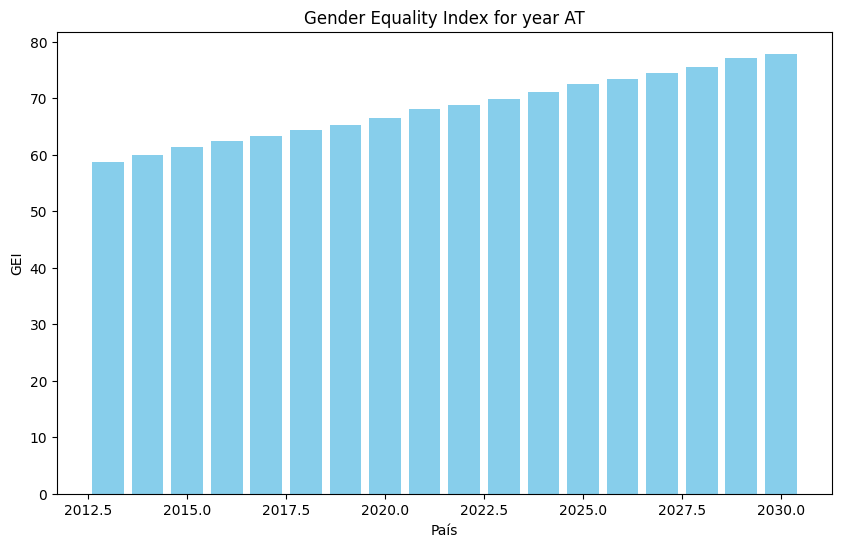

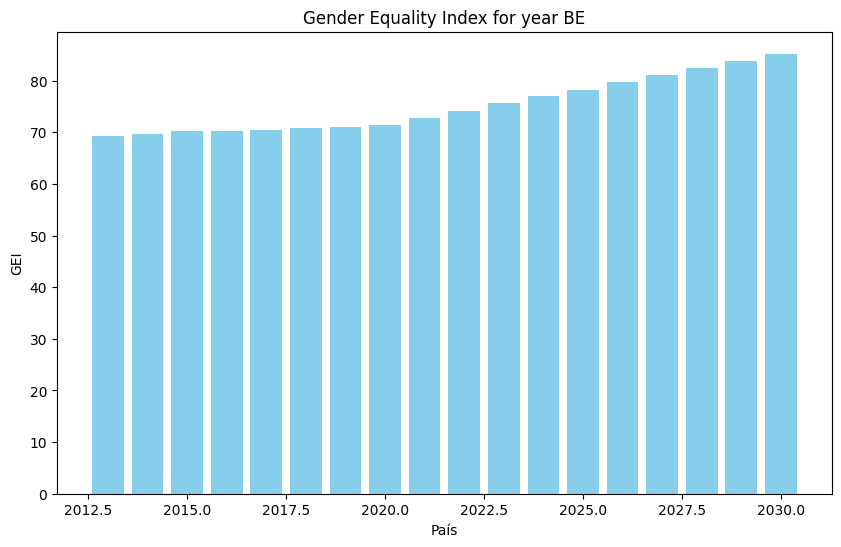

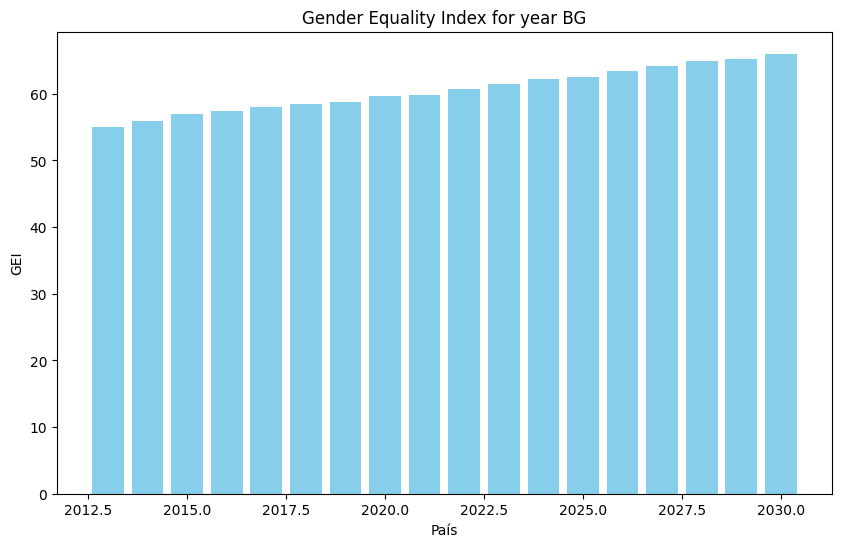

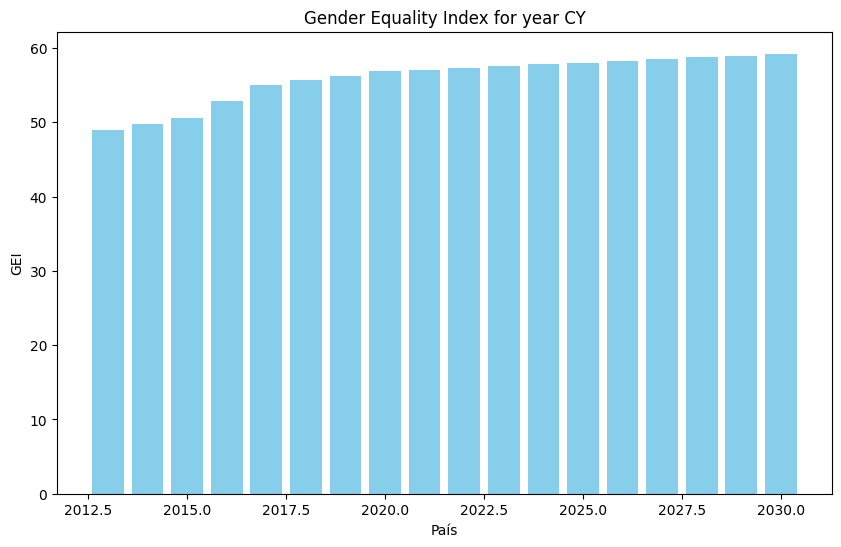

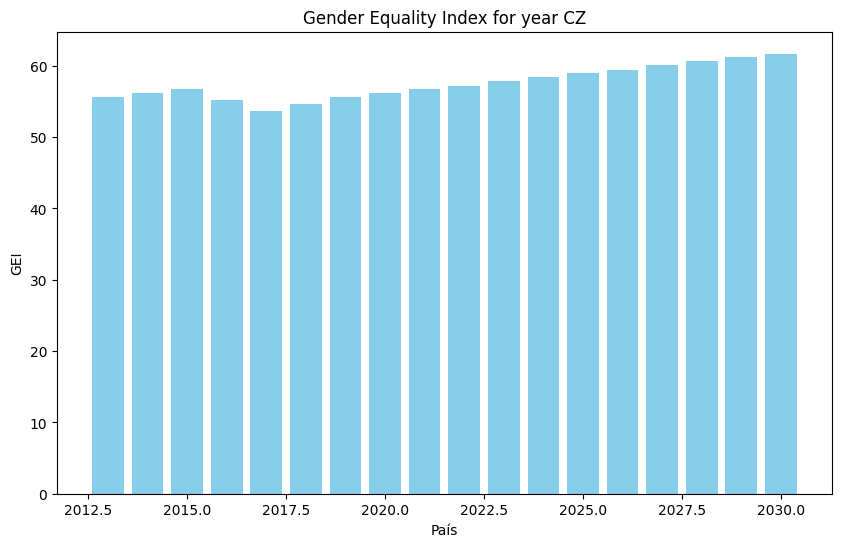

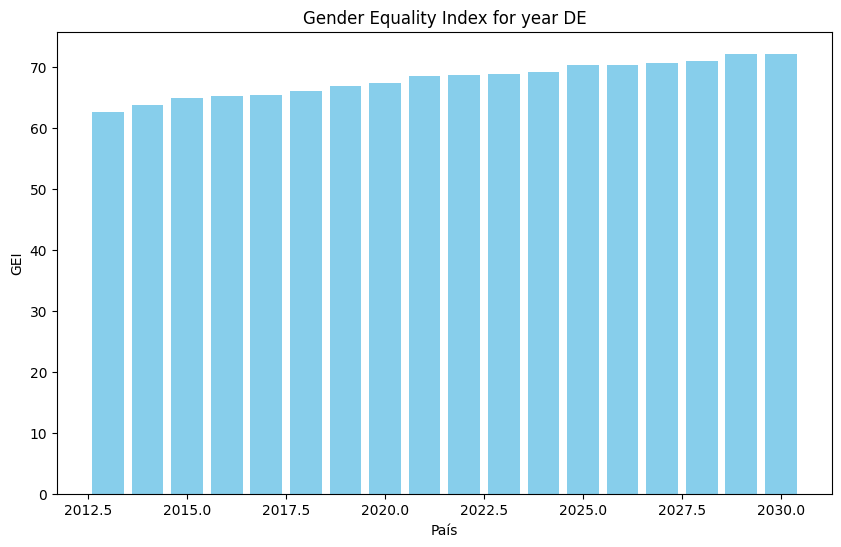

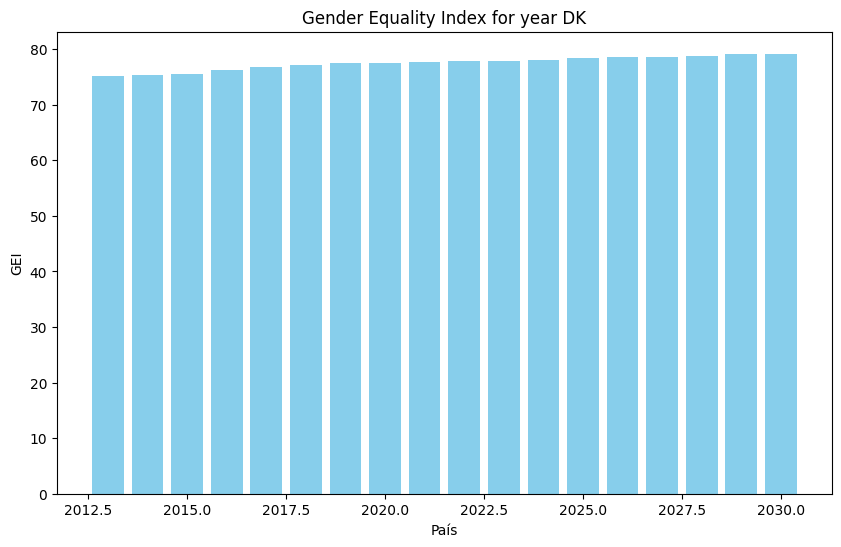

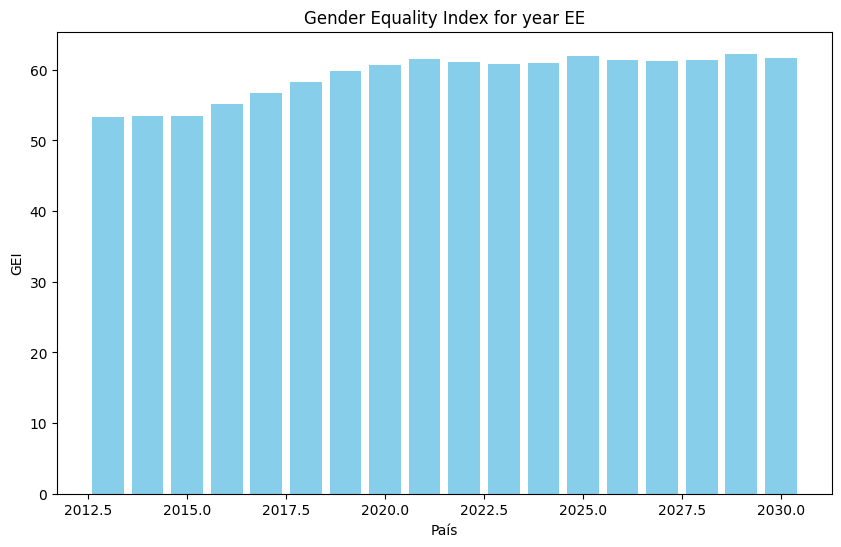

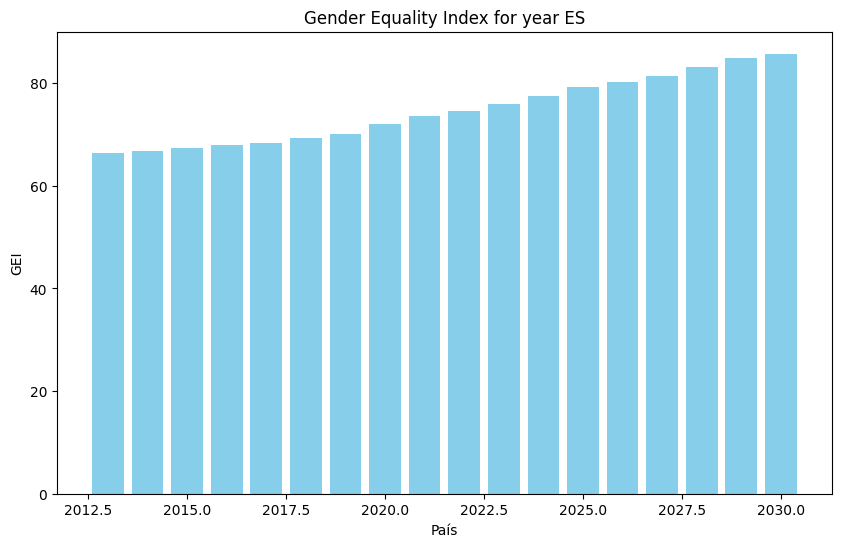

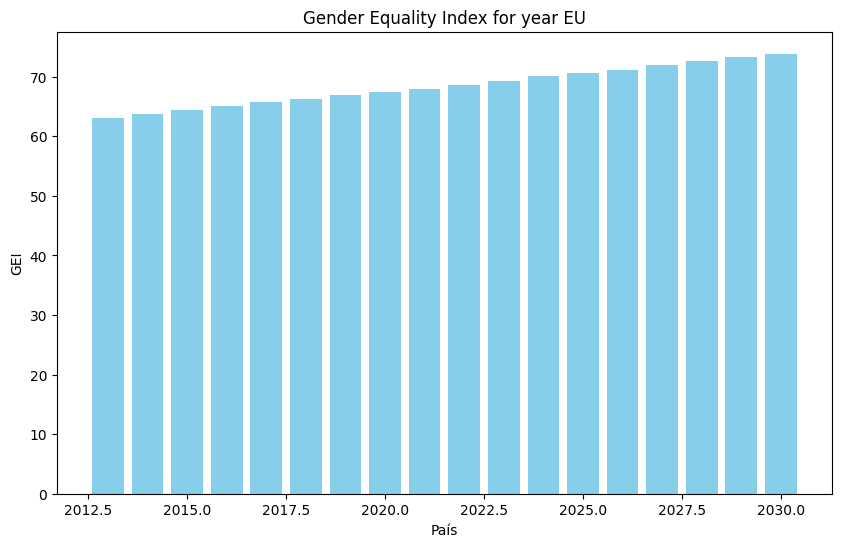

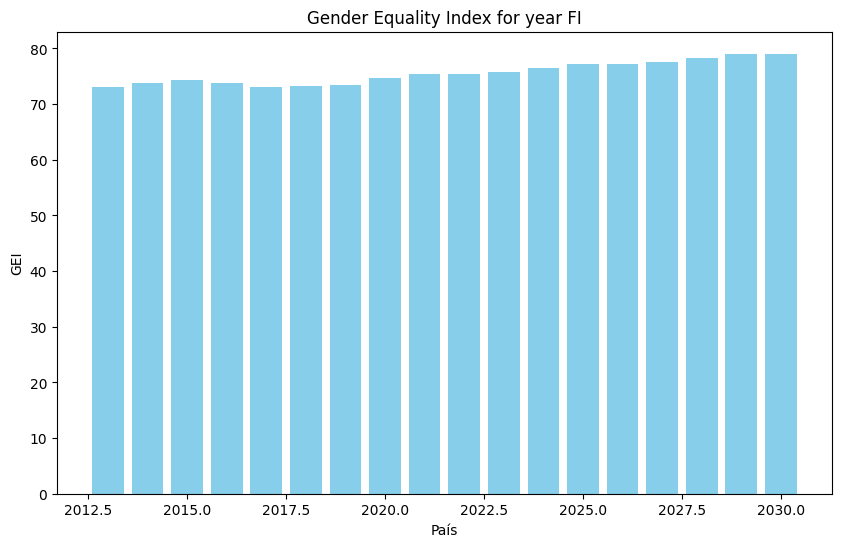

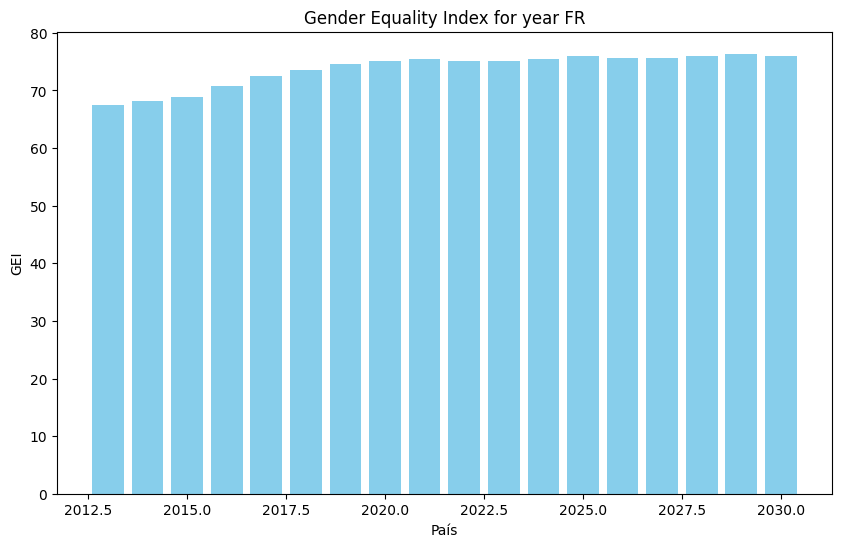

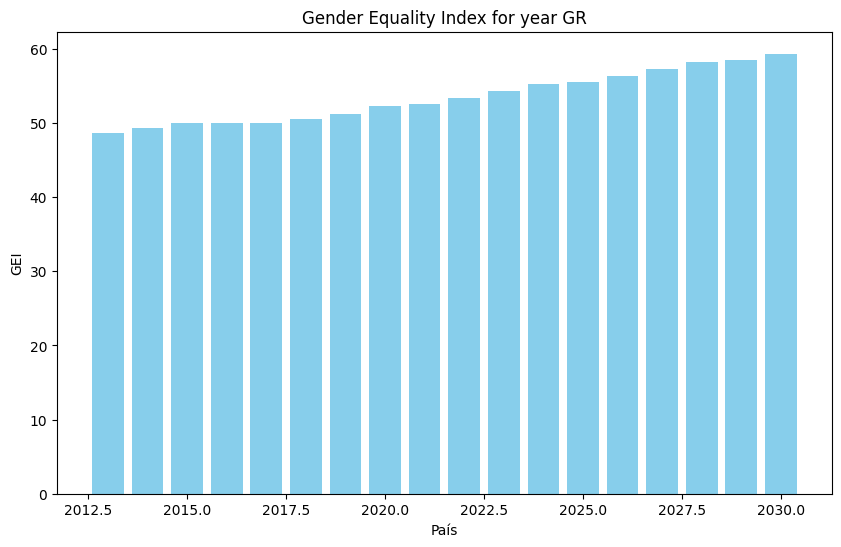

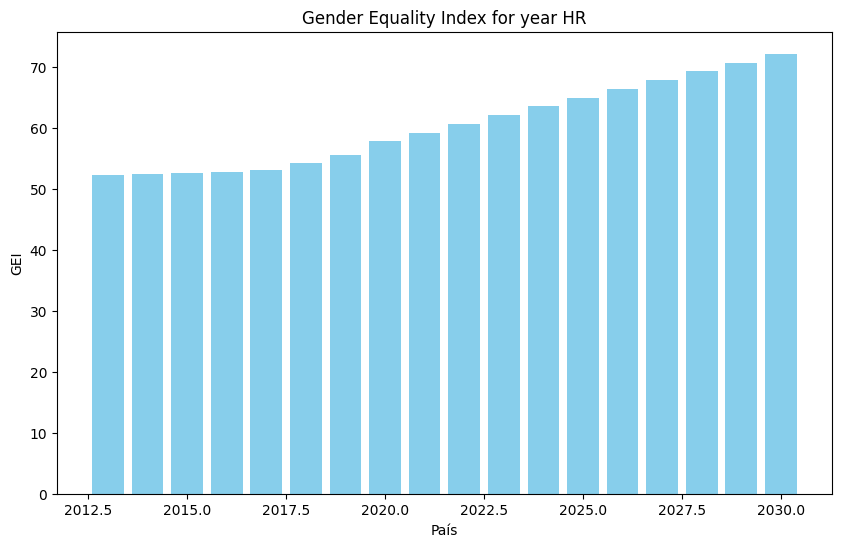

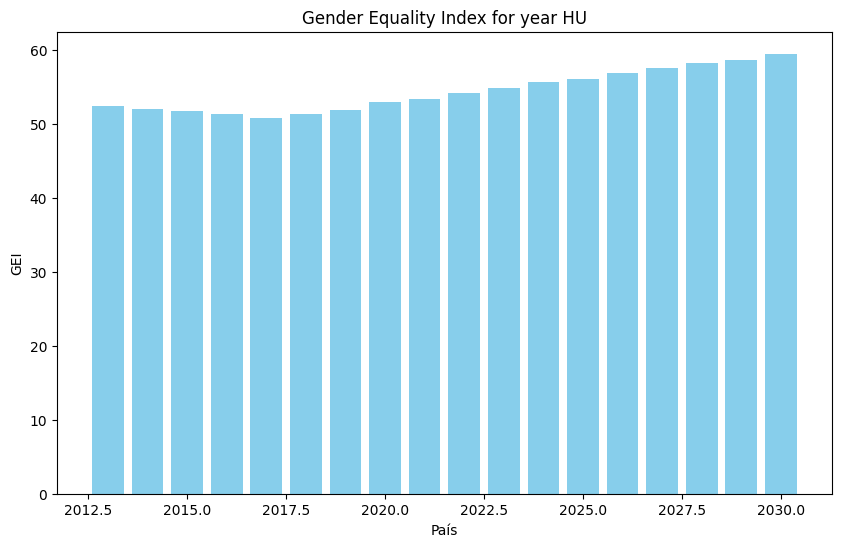

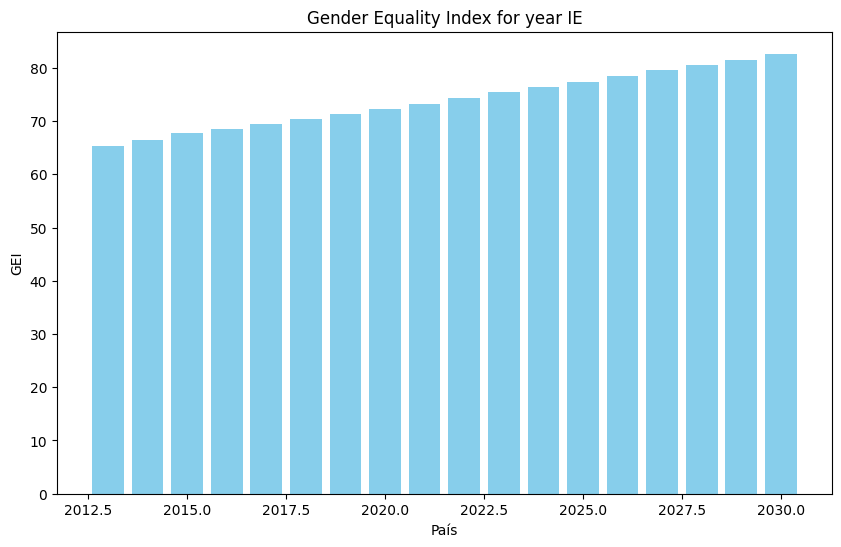

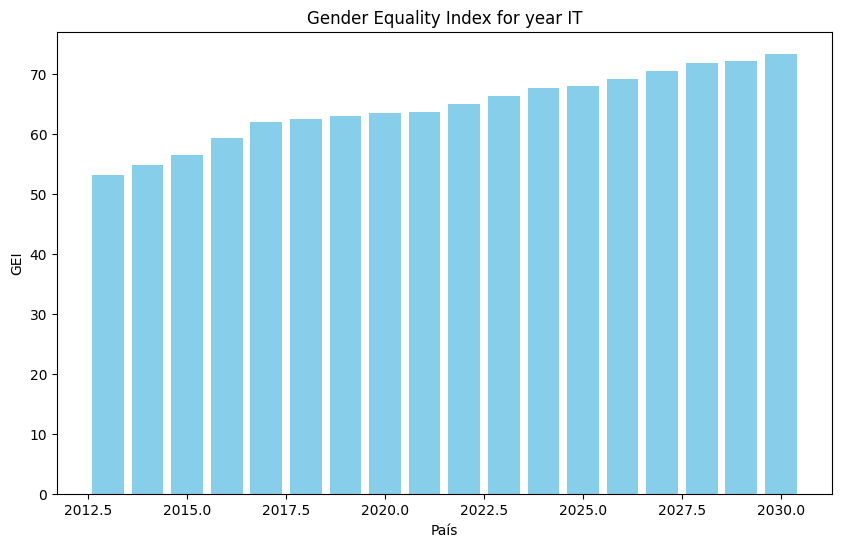

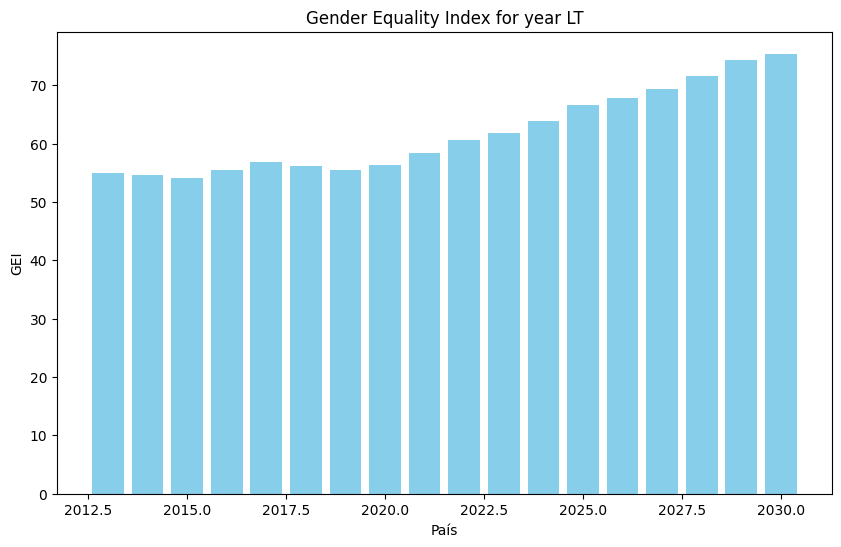

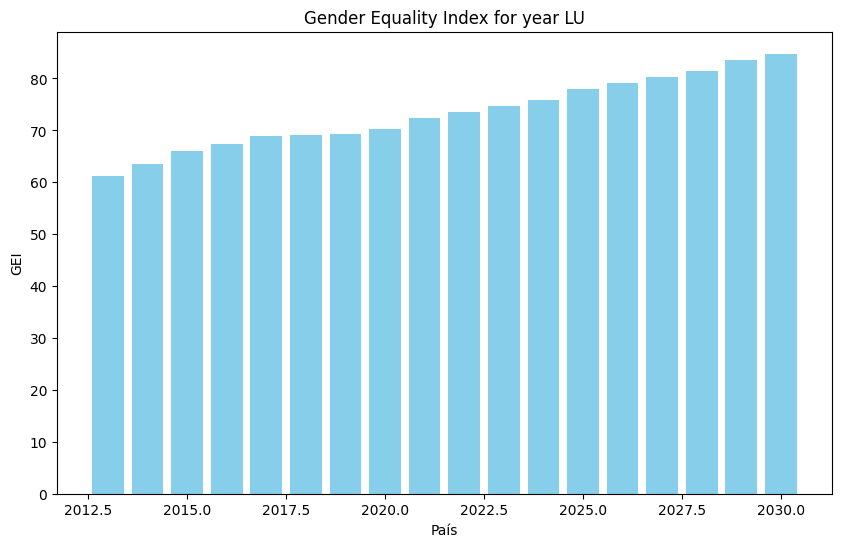

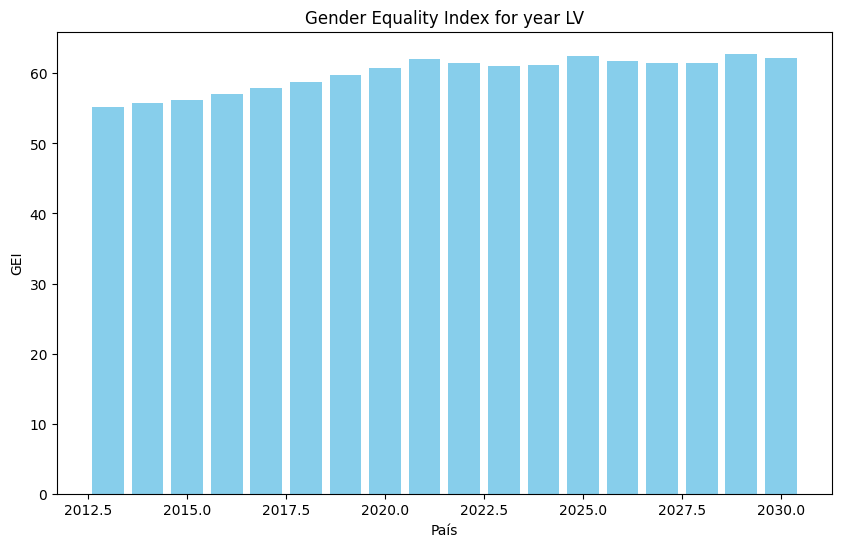

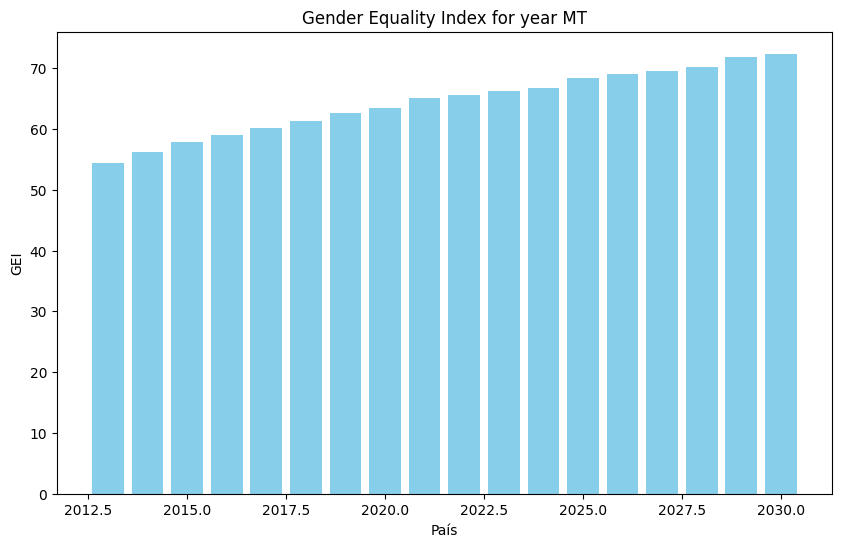

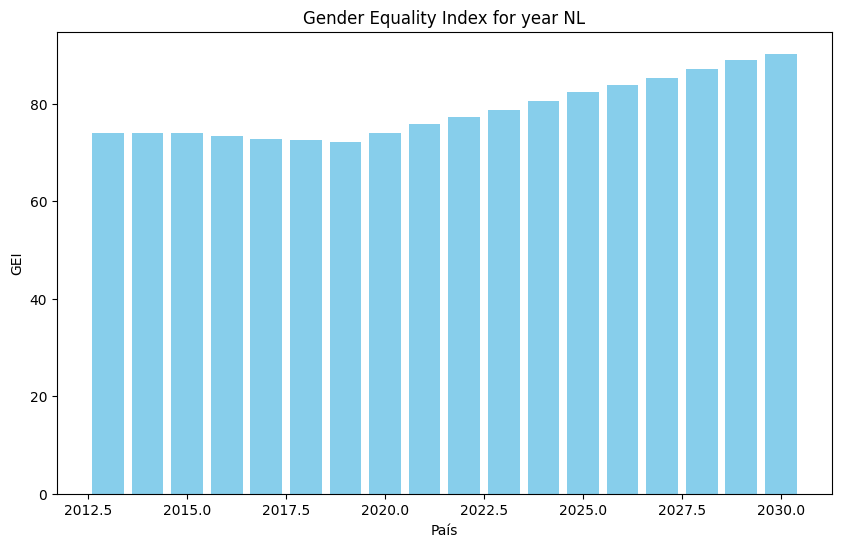

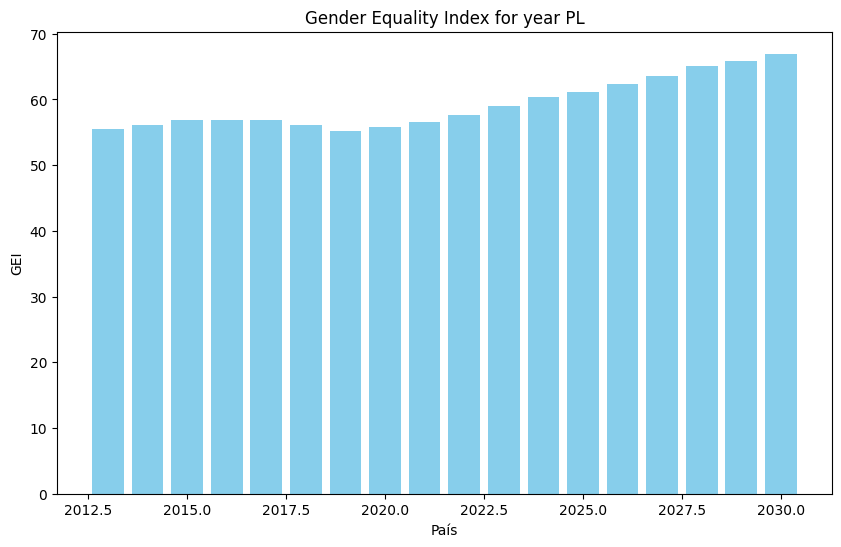

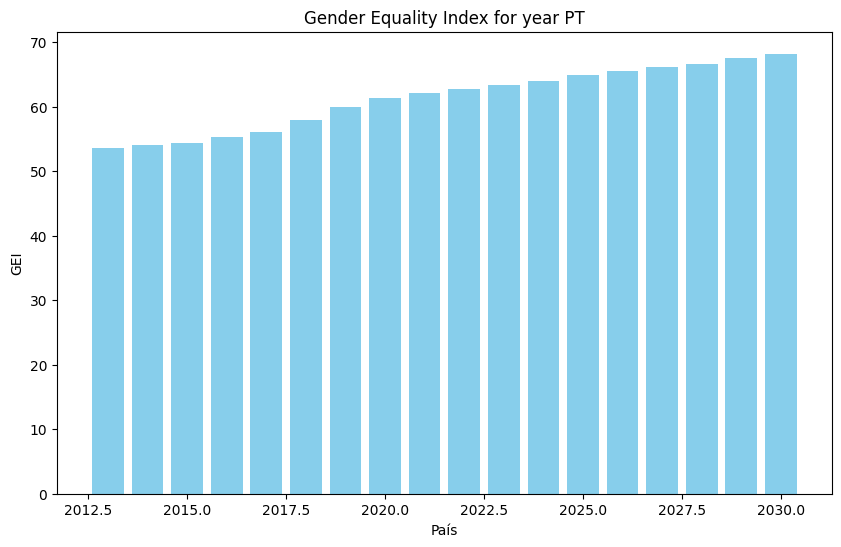

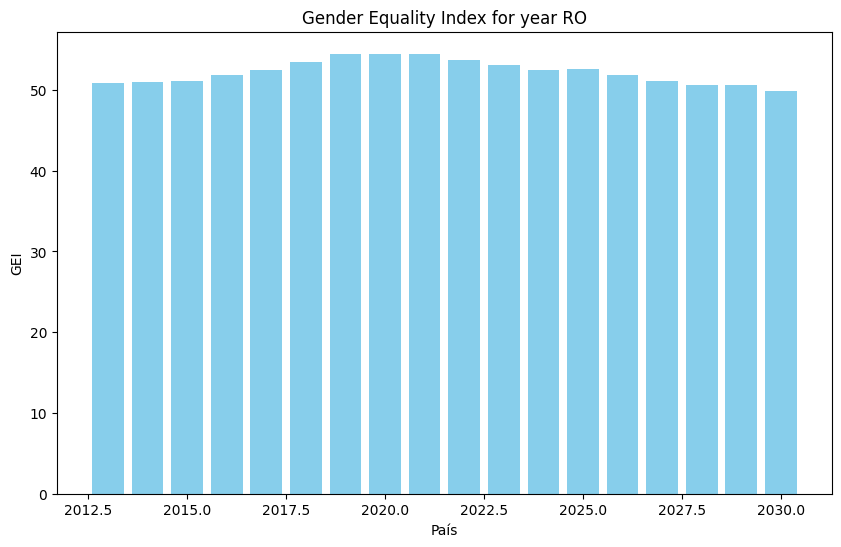

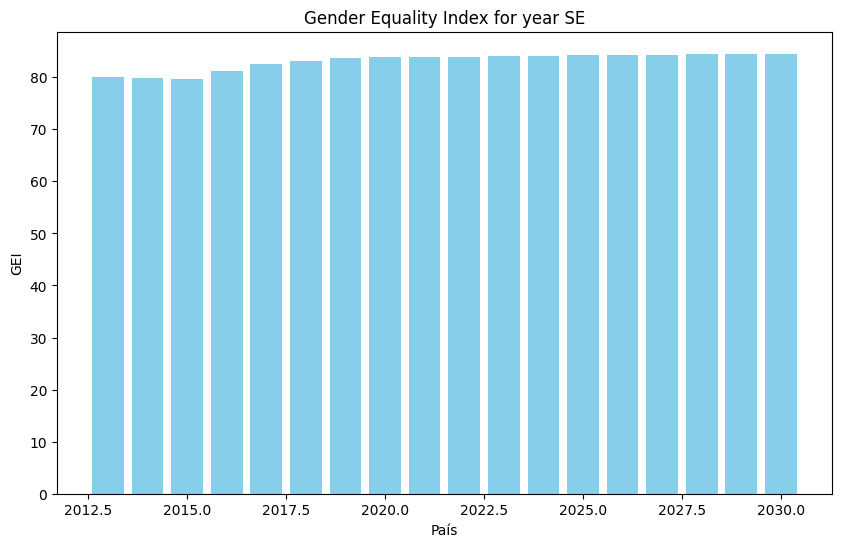

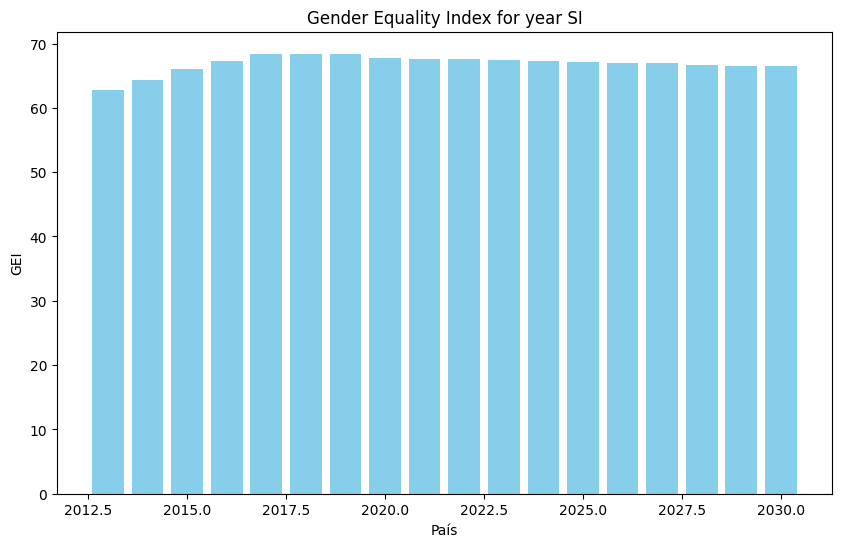

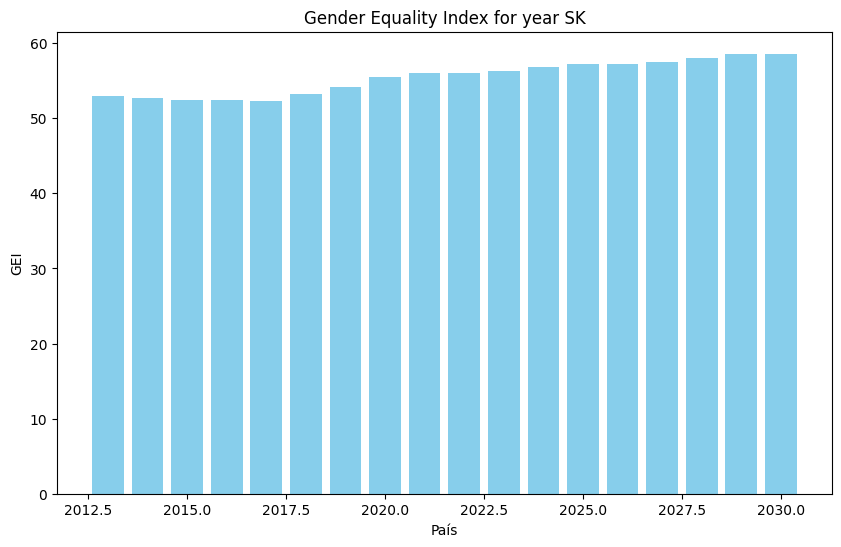

In [ ]:
unique_countries = gb_df['ID_Country'].unique()

for country in unique_countries:
    plt.figure(figsize=(10, 6))
    df_country = gb_df[gb_df['ID_Country'] == country]
    plt.bar(df_country['year'], df_country['GEI'], color='skyblue')
    plt.title('Gender Equality Index for year ' + str(country))
    plt.xlabel('País')
    plt.ylabel('GEI')
    plt.show()

### Extraemos la valoración de GEI para 2022


In [ ]:
GEI_2022 = df[df['year']==2022]

In [ ]:
GEI_2022.head()

,year,GEI,ID_Country
168,2022,68.802012,AT
169,2022,74.196806,BE
170,2022,60.695323,BG
171,2022,57.279331,CY
172,2022,57.239282,CZ


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'AT'),
  Text(1, 0, 'BE'),
  Text(2, 0, 'BG'),
  Text(3, 0, 'CY'),
  Text(4, 0, 'CZ'),
  Text(5, 0, 'DE'),
  Text(6, 0, 'DK'),
  Text(7, 0, 'EE'),
  Text(8, 0, 'GR'),
  Text(9, 0, 'ES'),
  Text(10, 0, 'EU'),
  Text(11, 0, 'FI'),
  Text(12, 0, 'FR'),
  Text(13, 0, 'HR'),
  Text(14, 0, 'HU'),
  Text(15, 0, 'IE'),
  Text(16, 0, 'IT'),
  Text(17, 0, 'LT'),
  Text(18, 0, 'LU'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'MT'),
  Text(21, 0, 'NL'),
  Text(22, 0, 'PL'),
  Text(23, 0, 'PT'),
  Text(24, 0, 'RO'),
  Text(25, 0, 'SE'),
  Text(26, 0, 'SI'),
  Text(27, 0, 'SK')])

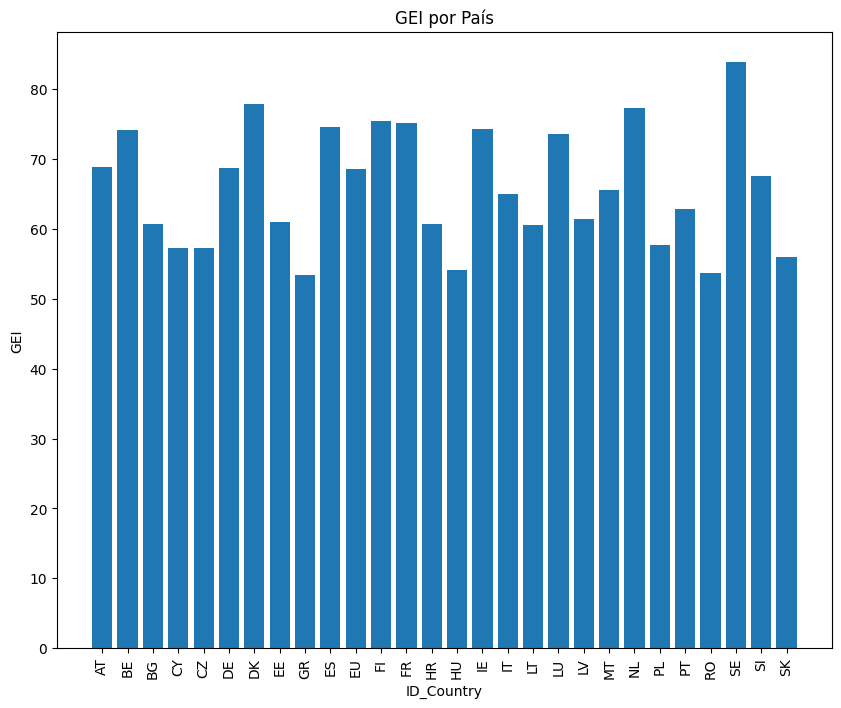

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(GEI_2022['ID_Country'], GEI_2022['GEI'])

# Mejorar la presentación del gráfico
plt.xlabel('ID_Country')
plt.ylabel('GEI')
plt.title('GEI por País')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad

### Extraemos la valoración de GEI para 2030

In [ ]:
GEI_2030 = df[df['year']==2030]

In [ ]:
GEI_2030.head()

,year,GEI,ID_Country
476,2030,77.841012,AT
477,2030,85.225425,BE
478,2030,66.012556,BG
479,2030,59.232113,CY
480,2030,61.705796,CZ


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'AT'),
  Text(1, 0, 'BE'),
  Text(2, 0, 'BG'),
  Text(3, 0, 'CY'),
  Text(4, 0, 'CZ'),
  Text(5, 0, 'DE'),
  Text(6, 0, 'DK'),
  Text(7, 0, 'EE'),
  Text(8, 0, 'GR'),
  Text(9, 0, 'ES'),
  Text(10, 0, 'EU'),
  Text(11, 0, 'FI'),
  Text(12, 0, 'FR'),
  Text(13, 0, 'HR'),
  Text(14, 0, 'HU'),
  Text(15, 0, 'IE'),
  Text(16, 0, 'IT'),
  Text(17, 0, 'LT'),
  Text(18, 0, 'LU'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'MT'),
  Text(21, 0, 'NL'),
  Text(22, 0, 'PL'),
  Text(23, 0, 'PT'),
  Text(24, 0, 'RO'),
  Text(25, 0, 'SE'),
  Text(26, 0, 'SI'),
  Text(27, 0, 'SK')])

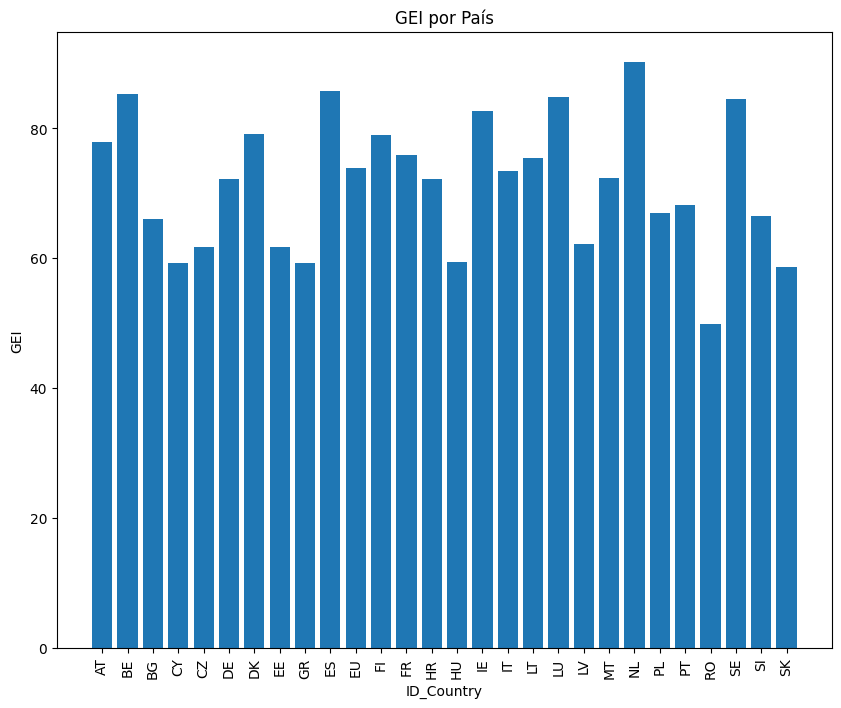

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(GEI_2030['ID_Country'], GEI_2030['GEI'])

# Mejorar la presentación del gráfico
plt.xlabel('ID_Country')
plt.ylabel('GEI')
plt.title('GEI por País')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad

In [ ]:
GEI_2030.to_excel('/content/drive/MyDrive/capstone/GEI_2030.xlsx', index=False)

### Diferencia 2022 - 2030

In [ ]:
# Asegúrate de que 'Country' es la columna de países e 'Index' es la columna de índices en ambos DataFrames
GEI_2030 = GEI_2030.set_index('ID_Country')
GEI_2022 = GEI_2022.set_index('ID_Country')

# Calcular la diferencia entre los índices de 2030 y 2022 para cada país
df_difference = GEI_2030['GEI'] - GEI_2022['GEI']

# El resultado es una Serie con la diferencia de índices para cada país
# Si quieres convertirlo a DataFrame
df_difference = df_difference.to_frame(name='GEI_Difference')

In [ ]:
df_difference.reset_index()
df_difference.sort_values(by='GEI_Difference', ascending=False, inplace=True)

In [ ]:
df_difference = df_difference.reset_index()

In [ ]:
df_difference

,ID_Country,GEI_Difference
0,LT,14.835469
1,NL,13.032381
2,HR,11.554131
3,LU,11.228608
4,ES,11.176447
5,BE,11.028619
6,PL,9.266977
7,AT,9.039001
8,IT,8.399235
9,IE,8.334137


In [ ]:
df_difference.to_excel('/content/drive/MyDrive/capstone/df_difference.xlsx', index=False)